<a href="https://colab.research.google.com/github/tibayo1/DL-Lung-Sounds/blob/master/Lung_Sounds_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries Needed. 

In [0]:
pip install pysoundfile
import os
import matplotlib.pyplot as plt

#for loading and visualizing audio files
import librosa
import librosa.display
import pandas as pd
import soundfile as sf

#to play audio
import IPython.display as ipd


Importing the Dataset from kaggle

Source: [Respiratory Sound Database](https://www.kaggle.com/vbookshelf/respiratory-sound-database)


In [0]:
import json

# read file
with open('/content/kaggle (1).json', 'r') as myfile:
    data=myfile.read()
# parse file
obj = json.loads(data)
#get username and key
kaggle_key = str(obj['key'])
kaggle_username = str(obj['username'])


In [3]:
import os

# parse file
obj = json.loads(data)

os.environ['KAGGLE_USERNAME'] = kaggle_username # username from the json file
os.environ['KAGGLE_KEY'] = kaggle_key # key from the json file
!kaggle datasets download -d "vbookshelf/respiratory-sound-database" # api copied from kaggle



100% 3.67G/3.69G [01:08<00:00, 51.8MB/s]
100% 3.69G/3.69G [01:08<00:00, 57.5MB/s]


In [0]:
#unzip the folder downloaded from kaggle
!unzip 'respiratory-sound-database.zip'

List Directories available in the Datasets

In [5]:
os.listdir("/content/respiratory_sound_database/Respiratory_Sound_Database")

['audio_and_txt_files',
 'patient_diagnosis.csv',
 'filename_differences.txt',
 'filename_format.txt']

# Create a Spectogram

Spectrograms are a useful technique for visualising the spectrum of frequencies of a sound and how they vary during a very short period of time.

Display of Annotation: A quick look at datasets based on their respiratory cycles, presence or absence of crackles or wheezes.

In [6]:
path = \
'/content/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/154_2b4_Al_mc_AKGC417L.txt'

col_names = ['Beginning_of_respiratory_cycle', 'End_of_respiratory_cycle', 'Presence/absence_of_crackles', 'Presence/absence_of_wheezes']

# Respiratory cycle column values are in 'seconds'.
# Presence = 1
# Absence = 0

df_annot = pd.read_csv(path, sep="\t", header=None, names=col_names)

df_annot.head(10)

,Beginning_of_respiratory_cycle,End_of_respiratory_cycle,Presence/absence_of_crackles,Presence/absence_of_wheezes
0,1.330,3.804,0,0
1,3.804,6.396,0,0
2,6.396,8.938,1,0
3,8.938,11.580,1,0
4,11.580,14.072,1,0
5,14.072,17.049,1,0
6,17.049,19.490,1,0


In [0]:
# Define helper functions

# Load a .wav file. 
# These are 24 bit files. The PySoundFile library is able to read 24 bit files.
# https://pysoundfile.readthedocs.io/en/0.9.0/

def get_wav_info(wav_file_2):
    data, rate = sf.read(wav_file_2)
    return data, rate

# source: Andrew Ng Deep Learning Specialization, Course 5
def graph_spectrogram(wav):
    data, rate = get_wav_info(wav)
    nfft = 200 # Length of each window segment
    fs = 8000 # Sampling frequencies
    noverlap = 120 # Overlap between windows
    nchannels = data.ndim
    if nchannels == 1:
        pxx, freqs, bins, im = plt.specgram(data, nfft, fs, noverlap = noverlap)
    elif nchannels == 2:
        pxx, freqs, bins, im = plt.specgram(data[:,0], nfft, fs, noverlap = noverlap)
    return pxx

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:7581: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


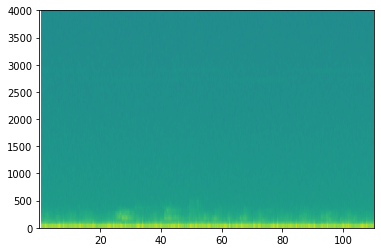

In [0]:
#Picking out one sound and viewing the spectrogram
path = \
'/content/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/154_2b4_Al_mc_AKGC417L.wav'
x = graph_spectrogram(path)

**Mel Spectogram (MFCC)**
For each audio file in the dataset, we will extract an MFCC (meaning we have an image representation for each audio sample0

In [0]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()


Data Loading **Process**

In [0]:
import librosa
from librosa import feature
import numpy as np
fn_list_i = [
 feature.chroma_stft,
 feature.spectral_centroid,
 feature.spectral_bandwidth,
 feature.spectral_rolloff
]
 
fn_list_ii = [
 feature.rmse,
 feature.zero_crossing_rate
]
def get_feature_vector(y,sr): 
   feat_vect_i = [ np.mean(funct(y,sr)) for funct in fn_list_i]
   feat_vect_ii = [ np.mean(funct(y)) for funct in fn_list_ii] 
   feature_vector = feat_vect_i + feat_vect_ii 
   return feature_vector

In [8]:
path = \
"/content/respiratory_sound_database/Respiratory_Sound_Database/audio_and_txt_files/"
os.chdir(path)
wav_file = []
import glob
wav_file_2 = glob.glob("*.wav")
for file in wav_file_2:
  y , sr = librosa.load(file,sr=None)
  feature_vector = get_feature_vector(y, sr)
  wav_file.append(feature_vector)
n_sounds = np.shape(wav_file)[0]


/usr/local/lib/python3.6/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')
/usr/local/lib/python3.6/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')
/usr/local/lib/python3.6/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')
/usr/local/lib/python3.6/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')
/usr/local/lib/python3.6/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequen

Number of sound Recordings =  920


In [9]:
import csv
import pandas 

norm_output = 'normals_00.csv'
header =[
 'chroma_stft',
 'spectral_centroid',
 'spectral_bandwidth',
 'spectral_rolloff',
 'rmse',
 'zero_crossing_rate'
]
with open(norm_output,'+w') as f:
 csv_writer = csv.writer(f, delimiter = ',')
 csv_writer.writerow(header)
 csv_writer.writerows(wav_file)
df = pandas.read_csv('normals_00.csv')
print(df)

     chroma_stft  spectral_centroid  ...      rmse  zero_crossing_rate
0       0.800976         841.412422  ...  0.129435            0.004425
1       0.806921        1081.125707  ...  0.006667            0.003603
2       0.798877        1162.093864  ...  0.356550            0.004552
3       0.745374         763.405118  ...  0.043853            0.005789
4       0.837135        1199.866316  ...  0.146722            0.002904
..           ...                ...  ...       ...                 ...
915     0.752873        2276.516499  ...  0.222885            0.022957
916     0.815195        2622.460023  ...  0.121328            0.012208
917     0.803329        1134.139911  ...  0.149340            0.003421
918     0.807882        1406.229475  ...  0.301815            0.004846
919     0.813844         475.912697  ...  0.311752            0.001829

[920 rows x 6 columns]


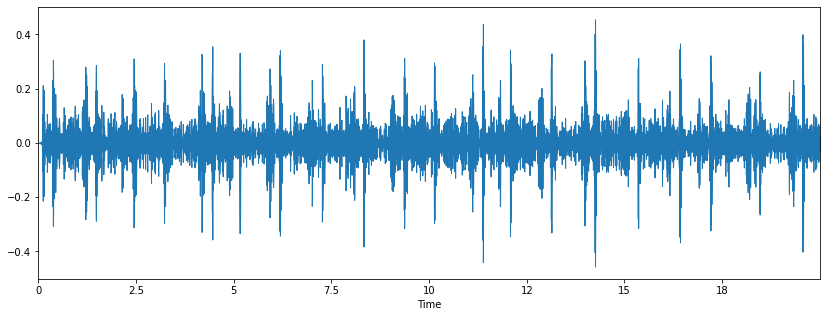

In [16]:
x, sr = librosa.load(path, sr=200)
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

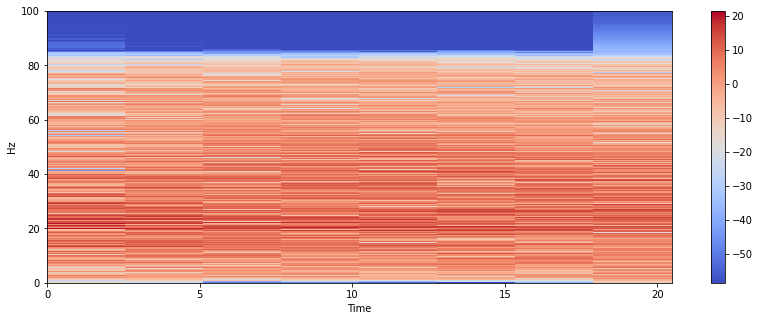

In [17]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

Since we see that all action is taking place at the bottom of the spectrum, we can convert the frequency axis to a logarithmic one

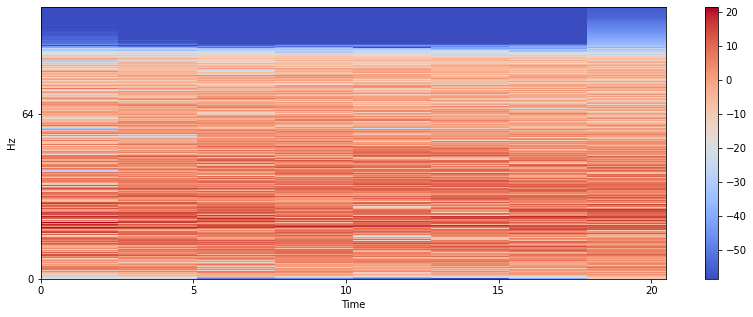

In [18]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

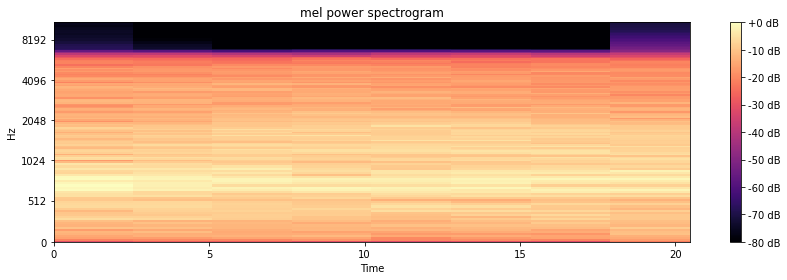

In [24]:

# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(x, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

TypeError: ignored

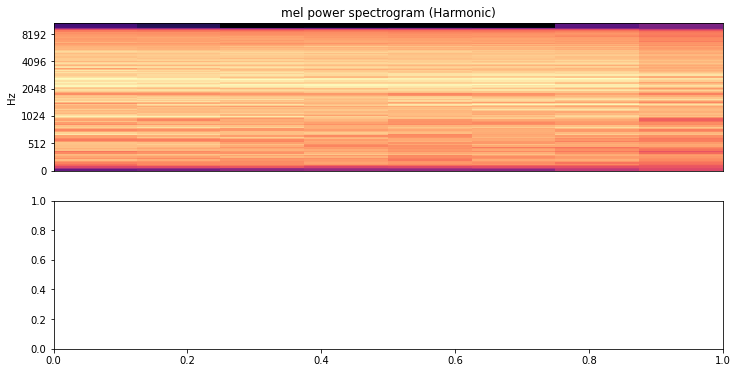

In [26]:
import librosa as lb
import librosa.display as lbdis
y_harmonic, y_percussive = lb.effects.hpss(x)
# What do the spectrograms look like?
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S_harmonic   = lb.feature.melspectrogram(y_harmonic)#, sr=sf)
S_percussive = lb.feature.melspectrogram(y_percussive)#, sr=sf)

# Convert to log scale (dB). We'll use the peak power as reference.
log_Sh = lb.power_to_db(S_harmonic, ref=np.max)
log_Sp = lb.power_to_db(S_percussive, ref=np.max)

plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
lbdis.specshow(log_Sh, sr=sf, y_axis='mel')
plt.title('mel power spectrogram (Harmonic)')
plt.subplot(2,1,2)
lbdis.specshow(log_Sp, sr=sf, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram (Percussive)')
plt.tight_layout()